#Intelligent Systems - Assignment 2 

- Member Names: Gorka Legarreta & Guillermo Pérez
- Group ID: 
- Assignment: 2
- Date: 4/4/2022
- Time spent in the assignment: 15 hours
- Proportion of effort done by members of the group: Gorka 60%, Guillermo 40%.
- Doubts and difficulties that arose during the realization: We had a hard time at the end of the task because we got stuck with some errors. We also had doubts about what features to show in the analysis.


---

**General instructions**
 1. If you use a function of a certain library, do not forget to include the corresponding command to install or load the library
 2. Do not forget to comment on the code, especially those non-trivial commands (part of the rating depends on the cleaning of the code)
 3. It is strongly recommended to test any implemented function in order to    check for its proper operation

---

 **Submission**
- Print the notebook in a PDF file with all the sections expanded and all the cells executed, in a way all the code can be seen, and all the results are shown.
- Save the notebook as ipynb file.
- Submit both files into ALUD

---

**Evaluation**
- Total Evaluation - 22,5%.
  - Correct and error-free execution
  - Efficiency and cleanness of the code
  - Documentation of the code and analysis of results

---
**Deadline**: 2022-04-04

In [ ]:
# PLEASE, INCLUDE HERE IF YOU USE ANY ADDITIONAL LIBRARY
library(glue)
library(readr)

## Problem statement (Labyrinth of the feet )

- The problem consists of a grid. Each square has a foot, which can be left or right. The squares can have walls on any of their 4 sides, but never on all 4.
- Knowing the scenario (initial and final square, distribution of the feet and location of the walls), the objective is to move square by square (without leaving the grid) from the initial square to the final square in such a way that the feet alternate.
- The possible movements are up, down, left and right.

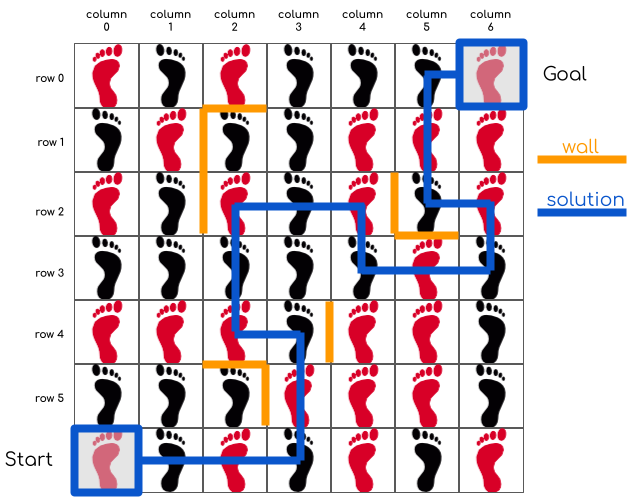

---



**Description of the problem**

Each scenario is defined with a text file:
 - Stage size (rows, columns).
 - NxM matrix with letters for left (L) and right (R) feet.
 - X,Y coordinates of the initial position.
 - X,Y coordinates of the goal position.
 - X,Y coordinates of the cells with wall on the left.
 - X,Y coordinates of the cells with wall on the right.
 - X,Y coordinates of the cells with wall on the top.
 - X,Y coordinates of the cells with wall on the bottom.
 - All elements are separated by semicolons (;).

So the example in the figure is coded as: 



```
7;7                   # number of rows;columns
L;R;L;R;R;R;L         # L=left | R=right, separated by ;
R;L;R;R;L;L;L
L;R;L;R;L;R;L
R;R;R;R;R;L;R
L;L;L;R;L;L;R
R;R;R;L;L;L;R
L;R;L;R;L;R;L
6,0                   # X,Y of initial position
0,6                   # X,Y of goal position
1,2;2,2;2,5;4,4;5,3   # Coordinates X,Y of blocks with wall in the left separated by ; (empty = -)
-                     # Coordinates X,Y of blocks with wall in the right separated by ; (empty = -)
1,2;5,2;3,5           # Coordinates X,Y of blocks with wall in the top separated by ; (empty = -)
-                     # Coordinates X,Y of blocks with wall in the bottom separated by ; (empty = -)
```



**IMPORTANT: coordinates are in terms of 0 to number of rows/columns minus one. You will have to adapt here to R, where positions in a matrix go from 1 to the number of rows/columns**

---





**You are asked to**

1. Formulate the problem and define (explain with text):
  - Data structures that define the state of the problem and the problem by itself.
  - Specific number of actions; and for each one of them: Conditions, Effect and Cost.
  - Explain the logic behind the check for final state.

2. Modify the Problem formulation section in this notebook to fill functions:
  - initialize.problem = function(file)
      - This function should receive a file name and read it to fill the initial state, the table with possible actions, the name and additional information (if needed).
  - is.applicable = function (state,action,problem)
      - This function should receive an action, an state and the problem to return TRUE or FALSE depending the action can or cannot be done.
  - effect = function (state,action)
      - This function returns the resulting state after application of the action received over the state received. (This function assumes the is.applicable has returned TRUE, so you do no have to check here).
  - is.final.state = function (state,finalstate==NULL)
      - This function checks if the agent reached the final state, returning TRUE or FALSE accordingly. 
  - to.string = function (state)
      - This function should print the state received.

3. (Try to) Solve the different problems provided in the file feet-maze-examples.zip (it is in the Drive folder) using the following methods:
  - BFS and BSF.GS
  - DFS and DFS.GS
  - DLS and DLS.GS with limits of (rows+columns) and (2*(rows+columns))
  - IDS and IDS.GS with depth limit of (2·(rows+columns)) and (rows·columns)
  - Use count.limit = 2000 in all the cases.

4. Document the analysis of results for each problem in the file feet-maze-examples.zip in terms of completeness, optimality and complexity.

5. Justify if the observed results are coherent with characteristics viewed in class.

# Search methods

🛑 (you don't have to modify here, just run)

## Expansion of a Node and Show path to a node

In [ ]:
expand.node = function(node, problem){
  newnodes = list()
  actions.possible = problem$actions.possible
  for (i in 1:nrow(actions.possible)){
    action = actions.possible[i, ] #accede a la fila i, columna le da igual Y METE TODAS
    state = node$state
    if (is.applicable(state,action,problem)){
      newnode = list()
      newnode$parent  = node
      newnode$parent$parent = NULL
      newnode$state   = effect(state,action)    
      newnode$actions = rbind(node$actions,action)
      newnode$depth   = node$depth+1
      newnode$cost    = node$cost+get.cost(actions.possible[i,],state)
      newnode$evaluation = get.evaluation(newnode$state,problem)
      newnodes        = append(newnodes,list(newnode))
    }
  }
  return(newnodes)
}



In [ ]:
to.string = function (state){
    print(state)
}

In [ ]:
show.path = function(problem,result){
  current = problem$state.initial
  to.string(current)
  for (i in 1:nrow(result$final.state$actions)){
    print(glue(""))
    print(glue("Action taken: {result$final$actions[i,]}"))
    current = effect(current, result$final$actions[i,])
    to.string(current)
  }
}

## Definition of the Blind Search methods
- BFS and BFS.gs
- DFS and DFS.gs
- DLS and DLS.gs
- IDS and IDS.gs

### BFS - Breatdth First Search

In [ ]:
BFS = function(problem, count.limit = 100){  
  result = list(method = "BFS", final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
  frontier = list(node)

  count = 1
  
  while (TRUE){
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}
    
    # (step 2) Extraction of the first node
    firstnode = frontier[[1]]; 
    frontier[[1]] = NULL        
    
    # (step 3) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status="Solution Found";break}
    
    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 
    
    # (step 5) Inclusion of the successors in the frontier
    frontier = c(frontier,newnodes) 

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }
  result$final.state = firstnode
  return(result)
}

### BFS.gs - Breadth First Search with Graph Search

In [ ]:
BFS.gs = function(problem, count.limit = 100){  
  result = list(method = "BFS-GS", final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier and the expanded list
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
  frontier = list(node)
  expanded = list()

  count = 1
  
  while (TRUE){    
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}

    # (step 2) Extraction of the first node and inclusion on expanded list
    firstnode = frontier[[1]]; 
    frontier[[1]] = NULL        
    expanded = append(expanded,list(firstnode))

    # (step 3) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status = "Solution Found"; break}
    
    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 

    # (step 5) Inclusion in the frontier of those nodes not expanded
    if (length(newnodes)>0){
      for (i in 1:length(newnodes)){
        newnode = newnodes[[i]]
        if (!any(sapply(frontier,function (x) identical(x$state,newnode$state)))){
          if (!any(sapply(expanded,function (x) identical(x$state,newnode$state)))){
              frontier = append(frontier,list(newnode))
          }
        }
      }
    }

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }
  result$final.state = firstnode
  return(result)
}

### DFS - Depth First Search

The only change with respect to BFS is in the step 2, where we take out of the frontier the last node

In [ ]:
DFS = function(problem, count.limit = 100){  
  result = list(method = "DFS", final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
  frontier = list(node)

  count = 1
  
  while (TRUE){
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}
    
    # (step 2) Extraction of the LAST node
    firstnode = frontier[[length(frontier)]]
    frontier[[length(frontier)]] = NULL    
    
    # (step 3) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status="Solution Found";break}
    
    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 
    
    # (step 5) Inclusion of the successors in the frontier
    frontier = c(frontier,newnodes) 

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }
  result$final.state = firstnode
  return(result)
}

###DFS.gs - Depth First Search with Graph Search
The only change with respect to BFS.gs is in the step 2, where we take out of the frontier the last node

In [ ]:
DFS.gs = function(problem, count.limit = 100){  
  result = list(method = "DFS-GS", final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier and the expanded list
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
  frontier = list(node)
  expanded = list()

  count = 1
  
  while (TRUE){    
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}

    # (step 2) Extraction of the first node and inclusion on expanded list
    firstnode = frontier[[length(frontier)]]
    frontier[[length(frontier)]] = NULL           
    expanded = append(expanded,list(firstnode))

    # (step 3) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status = "Solution Found"; break}
    
    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 

    # (step 5) Inclusion in the frontier of those nodes not expanded
    if (length(newnodes)>0){
      for (i in 1:length(newnodes)){
        newnode = newnodes[[i]]
        if (!any(sapply(frontier,function (x) identical(x$state,newnode$state)))){
          if (!any(sapply(expanded,function (x) identical(x$state,newnode$state)))){
              frontier = append(frontier,list(newnode))
          }
        }
      }
    }

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }
  result$final.state = firstnode
  return(result)
}

### DLS - Depth Limited Search
The only change with respect to DFS is the check for not violating the limit before including a node in the frontier

In [ ]:
DLS = function(problem, limit, count.limit = 100){  
  result = list(method = paste0("DLS-",limit), final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
  frontier = list(node)

  count = 1
  
  while (TRUE){
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}
    
    # (step 2) Extraction of the LAST node
    firstnode = frontier[[length(frontier)]]
    frontier[[length(frontier)]] = NULL    
    
    # (step 3) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status="Solution Found";break}
    
    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 
    
    # (step 5) Inclusion of the successors in the frontier - if not surpassing the depth limit
    if (length(newnodes)){
        for (i in 1:length(newnodes)){
          newnode = newnodes[[i]]		  
          if (newnode$depth <= limit){
            frontier = c(frontier,newnodes)
          }
        }
      } 

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }
  result$final.state = firstnode
  return(result)
}

### DLS - Depth Limited Search with Graph Search
The only change with respect to DFS.gs is the check for not violating the limit before including a node in the frontier

In [ ]:
DLS.gs = function(problem, limit,count.limit = 100){  
  result = list(method = paste0("DLS-GS-",limit), final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier and the expanded list
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
  frontier = list(node)
  expanded = list()

  count = 1
  
  while (TRUE){    
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}

    # (step 2) Extraction of the first node and inclusion on expanded list
    firstnode = frontier[[length(frontier)]]
    frontier[[length(frontier)]] = NULL           
    expanded = append(expanded,list(firstnode))

    # (step 3) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status = "Solution Found"; break}
    
    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 

    # (step 5) Inclusion in the frontier of those nodes not expanded - if not surpassing the depth limit
    if (length(newnodes)>0){
      for (i in 1:length(newnodes)){
        newnode = newnodes[[i]]
        if (!any(sapply(frontier,function (x) identical(x$state,newnode$state)))){
          if (!any(sapply(expanded,function (x) identical(x$state,newnode$state)))){
            if (newnode$depth <= limit){
              frontier = append(frontier,list(newnode))
            }
          }
        }
      }
    }

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }
  result$final.state = firstnode
  return(result)
}

### IDS - Iterative Deepening Search
The difference with DLS is in the increase of the limit once the frontier get empty, and the increase of the limit.

In [ ]:
IDS = function(problem, depth.limit, count.limit = 100){  
   result = list(method = paste0("IDS-",depth.limit), final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
  frontier = list(node)

  count = 1
  depth.current = 1

  while (TRUE){
    if (length(frontier)==0){
      if (depth.current<depth.limit){
        depth.current = depth.current + 1
        node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
        frontier = list(node)
      }else{
        result$status = "No nodes in the frontier. No solution possible.";
        break
      }
    }
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}
    
    # (step 2) Extraction of the LAST node
    firstnode = frontier[[length(frontier)]]
    frontier[[length(frontier)]] = NULL    
    
    # (step 3) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status="Solution Found";break}
    
    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 
    
    # (step 5) Inclusion of the successors in the frontier - if not surpassing the depth limit
    if (length(newnodes)){
        for (i in 1:length(newnodes)){
          newnode = newnodes[[i]]		  
          if (newnode$depth <= depth.current){
            frontier = c(frontier,newnodes)
          }
        }
      } 

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }
  result$final.state = firstnode
  return(result)
}

### IDS - Iterative Deepening Search with Graph Search
The difference with DLS.gs is in the increase of the limit once the frontier get empty, and the increase of the limit.

In [ ]:
IDS.gs = function(problem, depth.limit,count.limit = 100){  
  result = list(method = paste0("IDS-GS-",depth.limit), final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier and the expanded list
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
  frontier = list(node)
  expanded = list()

  count = 1
  depth.current = 1

  while (TRUE){   
    # (step 2) If frontier empty -> increase depth limit and start again
    if (length(frontier)==0){
      if (depth.current<depth.limit){
        depth.current = depth.current + 1
        node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
        frontier = list(node)
        expanded = list()
      }else{
        result$status = "No nodes in the frontier. No solution possible.";
        break
      }
    }
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}

    # (step 3) Extraction of the first node and inclusion on expanded list
    firstnode = frontier[[length(frontier)]]
    frontier[[length(frontier)]] = NULL           
    expanded = append(expanded,list(firstnode))

    # (step 4) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status = "Solution Found"; break}
    
    # (step 5) Expansion of the node
    newnodes = expand.node(firstnode, problem) 

    # (step 6) Inclusion in the frontier of those nodes not expanded
    if (length(newnodes)>0){
      for (i in 1:length(newnodes)){
        newnode = newnodes[[i]]
        if (!any(sapply(frontier,function (x) identical(x$state,newnode$state)))){
          if (!any(sapply(expanded,function (x) identical(x$state,newnode$state)))){
            if (newnode$depth <= depth.current){
              frontier = append(frontier,list(newnode))
            }
          }
        }
      }
    }

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }
  result$final.state = firstnode
  return(result)
}

## Greedy Best First Search (GBFS) method



In [ ]:
GBFS = function(problem,count.limit=100){
  result = list(method = "GBFS", final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
  frontier = list(node)

  count = 1
  
  while (TRUE){
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}

    # (step 2) Extraction of the first node
    firstnode = frontier[[1]]; 
    frontier[[1]] = NULL  

    # (step 3) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status="Solution Found";break}

    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 
    
    # (step 5) Inclusion of the successors in the frontier
    frontier = c(frontier,newnodes) 

    # (step 6) Reorder frontier according with Evaluation
    frontier = frontier[order(sapply(frontier,function (x) x$evaluation))]

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }

  result$final.state = firstnode
  return(result)
}

# Problem Formulation 

🚨 (You are asked for modifications here)

## Initialization
The initialization function must receive a file and return a list contaning the information needed to solve the problem (at least):
- state.initial
- actions.possible
- name

🔍 You can use "readLines" command to get the 4 lines of the file

🔍 You can use "strsplit" & "as.numeric" commands to get the numbers inside a line


In [ ]:
# getwd()  # Our path has to take '/content' into account

In [ ]:
initialize.problem = function(file){
  vec = c(read_lines(file, n_max =  4)) # read lines will help us to read txt and transform it to a sentence
  
  #First Line
  rowcols <- strsplit(vec[1], ";")
  nrow = as.numeric(unlist(rowcols))[1]
  ncol = as.numeric(unlist(rowcols))[2] # We got nrow and ncol here

  #Second Line
  feet <- strsplit(vec[2], ";") # We get list on feet
  mat = matrix(unlist(feet), nrow, ncol, TRUE) # We make a matrix from a vector
  
  #Third Line
  points  <- strsplit(vec[3],  ";" ) # We got our line and divide where ; appears
  initial = strsplit(points[[1]][1], ",") # We got the points in different positions
  initial = unlist(initial)
  final = strsplit(points[[1]][2], ",")
  final = unlist(final)
  irow = as.numeric(initial[1])
  icol = as.numeric(initial[2]) # We got here the initial row and the initial col
  frow = as.numeric(final[1])
  fcol = as.numeric(final[2]) # We got here the final row and the final col

  #Forth Line
  walls <- strsplit(vec[4], ";")
  # left
  l = strsplit(walls[[1]][1], " ")
  lmat = matrix(TRUE,nrow, ncol, FALSE)
  left = unlist(l)
  val = 1
  for(val in 1:length(left)){
    p = strsplit(left[val], ",")
    p = unlist(p)
    r = as.numeric(p[1])+1
    c = as.numeric(p[2])+1
    lmat[r,c] = FALSE
    val = val + 1
  }
  #right
  r = strsplit(walls[[1]][2], " ")
  rmat = matrix(TRUE,nrow, ncol, FALSE)
  right = unlist(r)
  val = 1
  for(val in 1:length(right)){
    p = strsplit(right[val], ",")
    p = unlist(p)
    r = as.numeric(p[1])+1
    c = as.numeric(p[2])+1
    rmat[r,c] = FALSE
    val = val + 1
  }
  # top
  t = strsplit(walls[[1]][3], " ")
  tmat = matrix(TRUE,nrow, ncol, FALSE)
  top = unlist(t)
  val = 1
  for(val in 1:length(top)){
    p = strsplit(top[val], ",")
    p = unlist(p)
    r = as.numeric(p[1])+1
    c = as.numeric(p[2])+1
    tmat[r,c] = FALSE
    val = val + 1
  }
  # bottom
  b = strsplit(walls[[1]][4], " ")
  bmat = matrix(TRUE,nrow, ncol, FALSE)
  bottom = unlist(b)
  val = 1
  for(val in 1:length(bottom)){
    p = strsplit(bottom[val], ",")
    p = unlist(p)
    r = as.numeric(p[1])+1
    c = as.numeric(p[2])+1
    bmat[r,c] = FALSE
    val = val + 1
  }
 
  walls = list(possibleToLeft = lmat, possibleToRight = rmat, possibleUpwards = tmat, possibleDownwards = bmat)
  problem = list(
    nrow = nrow,
    ncol = ncol,
    state.initial = c(irow+1, icol+1),
    state = c(irow+1,icol+1),
    state.final = c(frow+1,fcol+1),
    l.r = mat,
    actions.possible = data.frame(action=c(1,2,3,4)), #1 left , 2 right, 3 up, 4 down actionname = c("left","right","up","down"),
    walls = walls,    
    name = "Labyrinth of the feet"
  )
  # problem$state.initial
  # problem$state
  # problem$state.final   
  # problem$actions.possible 
  # problem$name = print(glue('The name of the document {}')) # We don't know what the name is
  # problem$<aditional info> = <Insert code here>  
  return(problem)
}

**problem$l.r** is a matrix with all the Left feet and Right feet of the size of nrow x ncol.

**problem$walls** is a list of 4 elements where each of those elements is a matrix with booleans that are supposed to allow or deny the movement towards the defined direction.

## Is applicable check

The function must return TRUE or FALSE according with if the action can be done or not over the specific state

In [ ]:
#Here we need to validate or deny any action

In [ ]:
is.applicable = function (state, action, problem){
  if (action == 1){ # LEFT is verified 
    if (state[2] > 1){
      if (problem$l.r[state[1], state[2]] == "L"){
        if (problem$l.r[state[1], state[2]-1] == 'R'){
          return (problem$walls[[1]][state[1], state[2]] && problem$walls[[2]][state[1], state[2] - 1]) #NEED to check walls, TRUE if not
        }
        return (FALSE) 
      } else if (problem$l.r[state[1], state[2]] == "R"){
          if (problem$l.r[state[1], state[2]-1] == 'L'){
            return (problem$walls[[1]][state[1], state[2]] && problem$walls[[2]][state[1], state[2] - 1]) #NEED to check walls, TRUE if not
          }
        return (FALSE)
      } else {
        return (FALSE)
      }
    }
    return (FALSE)
  } 
  
  
  
  else if (action == 2){ #RIGHT is verified
    if (state[2] < problem$ncol){
      if (problem$l.r[state[1], state[2]] == "L"){
        if (problem$l.r[state[1], (state[2]+1)] == "R"){
          return (problem$walls[[2]][state[1], state[2]] && problem$walls[[1]][state[1], state[2]+1]) #NEED to check walls, TRUE if not
        }
        return (FALSE)
      } else if (problem$l.r[state[1], state[2]] == "R"){
          if (problem$l.r[state[1], state[2]+1] == "L"){
            return (problem$walls[[2]][state[1], state[2]] && problem$walls[[1]][state[1], state[2]+1]) #NEED to check walls, TRUE if not
          }
        return (FALSE)
      } else {
        return (FALSE)
      }
    }
    return (FALSE)
  }


  else if (action == 3){ #UP is verified
    if (state[1] > 1){
      if (problem$l.r[state[1], state[2]] == "L"){
        if (problem$l.r[state[1]-1, state[2]] == 'R'){
          return (problem$walls[[3]][state[1], state[2]] && problem$walls[[4]][state[1] - 1, state[2]]) #NEED to check walls, TRUE if not
        }
        return (FALSE)
      } else if (problem$l.r[state[1], state[2]] == "R"){
          if (problem$l.r[state[1]-1, state[2]] == 'L'){
            return (problem$walls[[3]][state[1], state[2]] && problem$walls[[4]][state[1] - 1, state[2]]) #NEED to check walls, TRUE if not
          }
        return (FALSE)
      } else {
        return (FALSE)
      }
    }
    return (FALSE)    
  }



  else if (action == 4){ #DOWN is verified
    if (state[1] < problem$nrow){
      if (problem$l.r[state[1], state[2]] == "L"){
        if (problem$l.r[state[1]+1, state[2]] == "R"){          
          return (problem$walls[[4]][state[1], state[2]] && problem$walls[[3]][state[1]+1,state[2]] ) #NEED to check walls, TRUE if not
        }
        return (FALSE)
      } else if (problem$l.r[problem$state[1], problem$state[2]] == "R"){
          if (problem$l.r[problem$state[1]+1, problem$state[2]] == "L"){
            return (problem$walls[[4]][state[1], state[2]] && problem$walls[[3]][state[1]+1,state[2]]) #NEED to check walls, TRUE if not
          }
        return (FALSE)
      } else {
        return (FALSE)
      }
    }
    return (FALSE)    
  }
  
}


In [ ]:
# You are encouraged to make tests in order to check the results are the desired
# action = 1 left - 2 right - 3 up - 4 down

# EXAMPLE OF FUNCTIONABILITY

problem = initialize.problem('/content/file.txt')
# FROM THE INITIAL STATE (ROW 7, COL 1)
is.applicable(c(7,1),2,problem)
# FROM A STATE WITH A WALL IN ITS RIGHT
is.applicable(c(2,2),2,problem)

#The results are as desired


## Effect
It must return the state resulting on applying the action over the state

In [ ]:
effect = function (state, action){
  newstate = state
  # <insert code here in order to modify the resulting state>
  if (action == 1){
    #LEFT 
    
      newstate[2] = state[2] - 1
    
  } else if (action == 2){
    #RIGHT
    
      newstate[2] = state[2] + 1
    
  } else if (action == 3){
    #UP
    
      newstate[1] = state[1] - 1
    
  } else if (action == 4){
    #DOWN
    
      newstate[1] = state[1] + 1
    
  }
  return(newstate)
}

In [ ]:
# You are encouraged to make tests in order to check the results are the desired
# MOVE: LEFT 1, RIGHT 2, UP 3, DOWN 4
# ROAD TO FOLLOW IS: 2,2,2,3,3,1,3,3,2,2,4,2,2,3,1,3,3,2

# EXAMPLE OF THE POSIBLE SOLUTION
problem$state = problem$state.initial
problem$state = effect(problem$state,2)
problem$state
problem$state = effect(problem$state,2)
problem$state
problem$state = effect(problem$state,2)
problem$state
problem$state = effect(problem$state,3)
problem$state
problem$state = effect(problem$state,3)
problem$state
problem$state = effect(problem$state,1)
problem$state
problem$state = effect(problem$state,3)
problem$state
problem$state = effect(problem$state,3)
problem$state
problem$state = effect(problem$state,2)
problem$state
problem$state = effect(problem$state,2)
problem$state
problem$state = effect(problem$state,4)
problem$state
problem$state = effect(problem$state,2)
problem$state
problem$state = effect(problem$state,2)
problem$state
problem$state = effect(problem$state,3)
problem$state
problem$state = effect(problem$state,1)
problem$state
problem$state = effect(problem$state,3)
problem$state
problem$state = effect(problem$state,3)
problem$state
problem$state = effect(problem$state,2)
problem$state

## Final state check

It Must return TRUE or FALSE according with the state is final or not
** In case the final state is stablished by a condition, second argument could be omited


In [ ]:
is.final.state = function (state,problem=NULL){
  # <insert code here in order to check if a state is final> 
  if (state[1] == problem$state.final[1] && state[2] == problem$state.final[2]){
    return (TRUE)
  } else {
    return (FALSE)
  }
}

In [ ]:
# You are encouraged to make tests in order to check the results are the desired
# EXAMPLE THAT IT WORKS
is.final.state(problem$state.initial,problem) # MUST BE FALSE
is.final.state(problem$state.final,problem) # MUST BE TRUE

## Print a state

This function must print the state in console (in a legible way)


In [ ]:
to.string = function (state){
  # <insert code here to print the state> 
  # <try to print the state in the most visual way>
  print(glue("STATE: ROW: {state[1]}, COL: {state[2]}"))
 

  
}

In [ ]:
# You are encouraged to make tests in order to check the results are the desired
to.string(problem$state)

## Cost calculation

It should return the cost of applying an action over a state


In [ ]:
get.cost = function (action,state){
  # Return the cost of applying an action over a state
  return(1)
}

## Get evaluation

It is not needed for assignment, but it has to be defined 

In [ ]:
get.evaluation = function(state, problem){
  return(1)
}

# Solving and comparison

🚨 (You are asked for modifications here)

You can change the structure of this section accordingly to your preferences. 


## Initialize the problem 

And check everything goes well :)

In [ ]:
file = '/content/file.txt'
problem = initialize.problem(file) 
print(problem)

## Experiment

Use different methods (and different parameters) to solve the problem

In [ ]:
resultBFS = BFS(problem, count.limit = 2000)
resultBFS.gs = BFS.gs(problem, count.limit = 2000)
resultDFS = DFS(problem, count.limit = 2000)
resultDFS.gs = DFS.gs(problem, count.limit = 2000)
resultDLS = DLS(problem,limit = problem$nrow + problem$ncol, count.limit = 2000)
resultDLS.gs = DLS.gs(problem,limit = (2 *(problem$nrow + problem$ncol)), count.limit = 2000)
resultIDS = IDS(problem,depth.limit =(2 *(problem$nrow + problem$ncol)), count.limit = 2000)
resultIDS.gs = IDS.gs(problem,depth.limit = problem$nrow + problem$ncol, count.limit = 2000)

print(resultBFS)

## Analyze

Compare and discuss results obtained

In [ ]:
print(glue("Number of iterations:"))
iterations = list(resultBFS = resultBFS$iterations, resultBFS.gs = resultBFS.gs$iterations, resultDFS = resultDFS$iterations, resultDFS.gs = resultDFS.gs$iterations, resultDLS = resultDLS$iterations, resultDLS.gs = resultDLS.gs$iterations, resultIDS = resultIDS$iterations, resultIDS.gs = resultIDS.gs$iterations)
print(iterations)
print(glue("Number of maximum frontier:"))
frontier = list(resultBFS = resultBFS$max.frontier, resultBFS.gs = resultBFS.gs$max.frontier, resultDFS = resultDFS$max.frontier, resultDFS.gs = resultDFS.gs$max.frontier, resultDLS = resultDLS$max.frontier, resultDLS.gs = resultDLS.gs$max.frontier, resultIDS = resultIDS$max.frontier, resultIDS.gs = resultIDS.gs$max.frontier)
print(frontier)
print(glue("Final status:"))
final.status = list(resultBFS = resultBFS$status, resultBFS.gs = resultBFS.gs$status, resultDFS = resultDFS$status, resultDFS.gs = resultDFS.gs$status, resultDLS = resultDLS$status, resultDLS.gs = resultDLS.gs$status, resultIDS = resultIDS$status, resultIDS.gs = resultIDS.gs$status)
print(final.status)
print(glue("Depth of the algorithm:"))
depth = list(resultBFS = resultBFS$final.state$depth, resultBFS.gs = resultBFS.gs$final.state$depth, resultDFS = resultDFS$final.state$depth, resultDFS.gs = resultDFS.gs$final.state$depth, resultDLS = resultDLS$final.state$depth, resultDLS.gs = resultDLS.gs$final.state$depth, resultIDS = resultIDS$final.state$depth, resultIDS.gs = resultIDS.gs$final.state$depth)
print(depth)



```
Comment and discuss your results here!
```
We find the solution to the problem with the algorithms **BFS.gs, DFS.gs and DLS.gs**.

In terms of the number of iterations, the most efficient algorithms, having the minimum number, are **DFS.gs and DLS.gs with 31** and BFS.gs with 36 iterations. In addition, the frontier has reached the number of 4 nodes with this two algorithms.



